quick demo to read in bern reflectivity data

In [1]:
from dash import Dash, html, dcc, callback, Output, Input
import dash_bootstrap_components as dbc
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import EngFormatter
import phoeniks as pk

Or Could be created by passing file names to the Phoeniks reader functions

In [2]:
ref_file = "Data/ref.csv"
sample_file = "Data/sig.csv"

data = pk.reader.create_data(ref_file, sample_file, reader='XY', sample_thickness=450e-6, sample_name=None)

In [3]:

data.td_reference = data.linear_offset(data.td_reference)
data.td_sample = data.linear_offset(data.td_sample)
#data.offset_time_to_reference_peak()

data.mode = 'reference_sample'

In [4]:
# run iteractive interface
data.generate_layout()
data.app.run_server(jupyter_mode='tab')


Dash app running on http://127.0.0.1:8050/


<IPython.core.display.Javascript object>

[2024-08-03 15:44:32,267] ERROR in app: Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "c:\Users\eenadbu\PortableApps\Git\phoeniks\phoeniks\thz_data.py", line 185, in get_window
    window[start:end] = window_func(length, alpha, sym=False)
    ~~~~~~^^^^^^^^^^^
ValueError: could not broadcast input array from shape (3600,) into shape (0,)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\eenadbu\AppData\Local\mambaforge\envs\development\Lib\site-packages\flask\app.py", line 2529, in wsgi_app
    response = self.full_dispatch_request()
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\eenadbu\AppData\Local\mambaforge\envs\development\Lib\site-packages\flask\app.py", line 1825, in full_dispatch_request
    rv = self.handle_user_exception(e)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\eenadbu\AppData\Local\mambaforge\envs\development\Lib\site-packages\flask

You can then used the save functionality to save a file in a range of formats, the first exports the data object as a pickle file 

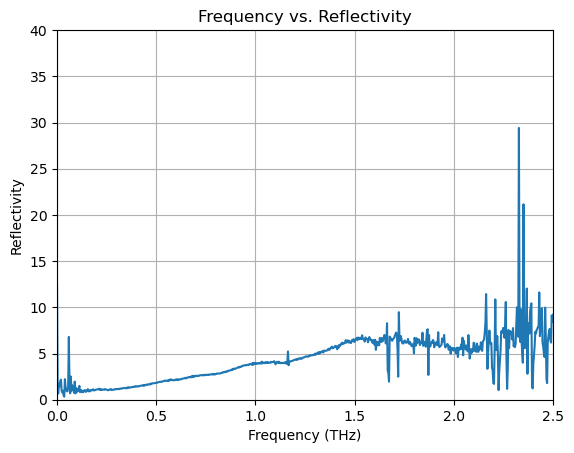

In [25]:
x = data.frequency/1E12
y = np.abs(data.fd_reference)/np.abs(data.fd_sample)
plt.plot(x,y)

plt.xlim(0, 2.5)  # Replace 0 and 12 with your desired range
plt.ylim(0, 40)
# Rest of the code remains the same
plt.xlabel("Frequency (THz)")
plt.ylabel("Reflectivity")
plt.title("Frequency vs. Reflectivity")
plt.grid()
plt.show()